In [140]:
'''
C11
Throw two dice 10 times and record the sum of the numbers obtained.
Draw the frequency curve of sum vs frequency.
Record the number of times you obtain the sum as greater than 5.
Next perform 10 trials of throwing two dice for 10 times.
Step 1: Find the number of times you obtain the sum
as greater than 5, in each trial- that is, Count
Step 2: Draw the graph of Count vs frequency
for all the trials put together.
Next perform 20 trials of throwing two dice for 10 times.
Repeat Steps 1 and 2.
Increase the number of trials to 30, 40, · · · , 100, 200, · · · , 1000, · · ·
Repeat Steps 1 and 2 in each case.
What do you observe ?- Can you identify the distribution?
'''
# Negatively Skewed Leptokurtic

'\nC11\nThrow two dice 10 times and record the sum of the numbers obtained.\nDraw the frequency curve of sum vs frequency.\nRecord the number of times you obtain the sum as greater than 5.\nNext perform 10 trials of throwing two dice for 10 times.\nStep 1: Find the number of times you obtain the sum\nas greater than 5, in each trial- that is, Count\nStep 2: Draw the graph of Count vs frequency\nfor all the trials put together.\nNext perform 20 trials of throwing two dice for 10 times.\nRepeat Steps 1 and 2.\nIncrease the number of trials to 30, 40, · · · , 100, 200, · · · , 1000, · · ·\nRepeat Steps 1 and 2 in each case.\nWhat do you observe ?- Can you identify the distribution?\n'

In [141]:
from collections import Counter
from scipy.stats import kurtosistest
import random
import time
import numpy as np
import pandas as pd
import seaborn as sns
import scipy.stats as stats
import matplotlib.pyplot as plt
import matplotlib.ticker as ticker

In [142]:
probabilities = [1/6, 1/6, 1/6, 1/6, 1/6, 1/6]
times = 10
num_dice = 2

In [143]:
plt.style.use("ggplot")

In [144]:
def plot_frequency_curve(data, xlabel, ylabel, title):
    unique_sums, counts = np.unique(data, return_counts=True)
    sns.set(style='whitegrid')
    fig, ax = plt.subplots()
    sns.lineplot(x=unique_sums, y=counts, ax=ax)
    ax.set_xlabel(xlabel)
    ax.set_ylabel(ylabel)
    ax.set_title(title)
    plt.show()

In [145]:
def list_stats(lst):
    mean = np.mean(lst)
    stdev = np.std(lst)
    mad = np.mean(np.abs(lst - mean))
    median = np.median(lst)
    variance = np.var(lst)
    f_kurtosis = stats.kurtosis(lst, fisher=True)
    p_kurtosis = stats.kurtosis(lst, fisher=False)
    fc_kurtosis = stats.kurtosis(lst, fisher=True, bias=False)
    pc_kurtosis = stats.kurtosis(lst, fisher=False, bias=False)
    skewness = stats.skew(lst)
    
    print(f'Mean = {mean}')
    print(f'Std Dev = {stdev}')
    print(f'Mean Absolute Deviation = {mad}')
    print(f'Median = {median}')
    print(f'Variance = {variance}')
    print(f'Fisher Kurtosis = {f_kurtosis}')
    print(f'Pearson Kurtosis = {p_kurtosis}')
    print(f'Fisher Kurtosis with K-Statistics = {fc_kurtosis}')
    print(f'Pearson Kurtosis with K-Statistics = {pc_kurtosis}')
    print(f'Skewness = {skewness}')
    if len(lst) > 20:
        kurtosis_stat, p_value = kurtosistest(lst) # ‘two-sided’: the kurtosis of the distribution underlying the sample is different from that of the normal distribution
        print(f'Kurtosis Test Z-Score = {kurtosis_stat}')
        print(f'Kurtosis Test P-Value = {p_value}') 

In [146]:
def plot_and_list(list, xlabel, ylabel, title):
    plot_frequency_curve(list, xlabel=xlabel, ylabel=ylabel, title=title)
    sns.kdeplot(data=greater_than_5, fill=True, color="Blue")
    sns.displot(greater_than_5)
    sns.histplot(greater_than_5, kde="True")
#    stats.cumfreq(list, numbins=len(set(list)), defaultreallimits=None, weights=None)
    list_stats(list)

In [147]:
def roll_dice(probabilities=probabilities):
    return random.choices(range(1, 7), weights=probabilities)[0]

In [148]:
def sum_roll_two_dice(probabilities=probabilities, times=times, num_dice=num_dice):
    sum = []
    rolls = []
    total = 0
    j = 0
    for i in range(times):
        while j is not num_dice:
            result = roll_dice(probabilities)
            rolls.append(result)
            j = j + 1
        for element in rolls:
            total = total + element
        sum.append(total)
        rolls = []
        total = 0
        j = 0
    return sum
sum_roll_two_dice(probabilities, times, num_dice)

[9, 10, 8, 7, 5, 4, 8, 6, 7, 9]

In [149]:
def throw_dice(probabilities=probabilities, times=times, trials=10, num_dice=num_dice):
    greater_than_5 = []
    trial_total = []
    all_trials = []
    for i in range(trials):
        trial_result = sum_roll_two_dice(probabilities, times, num_dice)
        count_greater_than_5 = 0
    
        
        for element in trial_result:
            all_trials.append(element)
            if element > 5:
                count_greater_than_5 = count_greater_than_5 + 1    
        
        trial_total.append(trial_result)
        greater_than_5.append(count_greater_than_5)
        
    return greater_than_5

Rolled Numbers : [7, 4, 3, 8, 8, 5, 5, 6, 7, 7]
Count of Sum Greater than 5 : 6


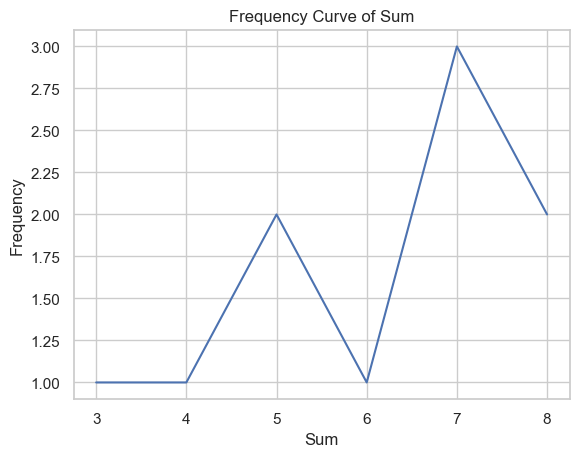

Mean = 6.0
Std Dev = 1.61245154965971
Mean Absolute Deviation = 1.4
Median = 6.5
Variance = 2.6
Fisher Kurtosis = -1.017751479289941
Pearson Kurtosis = 1.982248520710059
Fisher Kurtosis with K-Statistics = -0.8349535080304311
Pearson Kurtosis with K-Statistics = 2.165046491969569
Skewness = -0.42935100434726


In [150]:
# Throw two dice 10 times and record the sum of the numbers obtained.
# Draw the frequency curve of sum vs frequency.
# Record the number of times you obtain the sum as greater than 5.

list = sum_roll_two_dice(probabilities=probabilities, times=times, num_dice=num_dice)

count_greater_than_5 = 0
for element in list:
    if element > 5:
        count_greater_than_5 = count_greater_than_5 + 1
        
print(f'Rolled Numbers : {list}')
print(f'Count of Sum Greater than 5 : {count_greater_than_5}')
plot_frequency_curve(data=list, xlabel='Sum', ylabel='Frequency', title='Frequency Curve of Sum')
list_stats(list)

In [151]:
trials = 10
greater_than_5 = []
greater_than_5 = throw_dice(probabilities, times, trials)
greater_than_5

[9, 9, 8, 5, 8, 7, 8, 8, 7, 8]

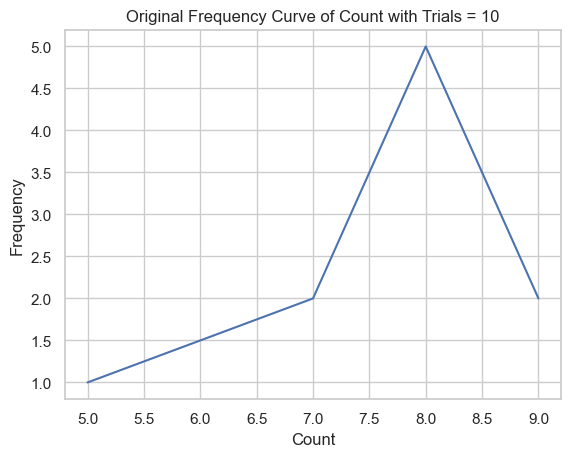

Mean = 7.7
Std Dev = 1.1
Mean Absolute Deviation = 0.82
Median = 8.0
Variance = 1.21
Fisher Kurtosis = 1.0555289939211816
Pearson Kurtosis = 4.055528993921182
Fisher Kurtosis with K-Statistics = 2.8303101856820883
Pearson Kurtosis with K-Statistics = 5.830310185682088
Skewness = -1.1900826446280997


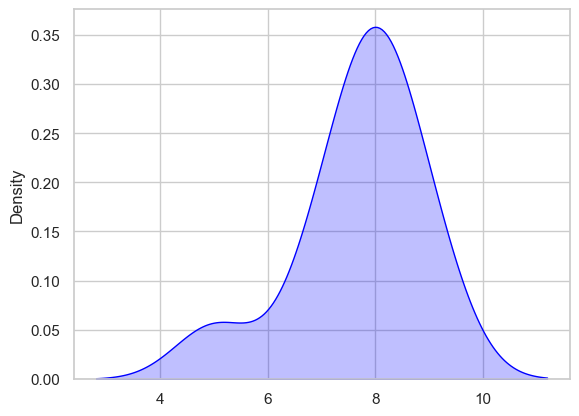

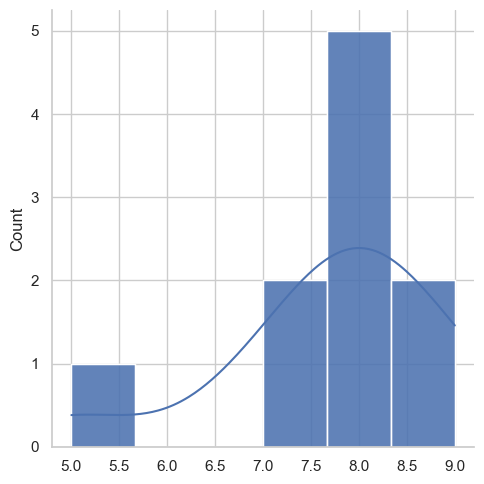

In [152]:
plot_and_list(list=greater_than_5, xlabel="Count", ylabel="Frequency", title=f"Original Frequency Curve of Count with Trials = {trials}")

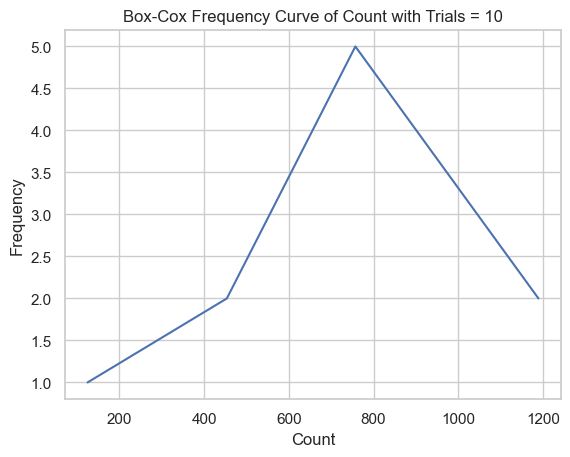

Mean = 719.5650806621959
Std Dev = 307.23064694580114
Mean Absolute Deviation = 225.38690835041697
Median = 757.0303123242109
Variance = 94390.6704227355
Fisher Kurtosis = -0.38788112121588325
Pearson Kurtosis = 2.6121188787841167
Fisher Kurtosis with K-Statistics = 0.27856730356477755
Pearson Kurtosis with K-Statistics = 3.2785673035647775
Skewness = -0.1398796854918356


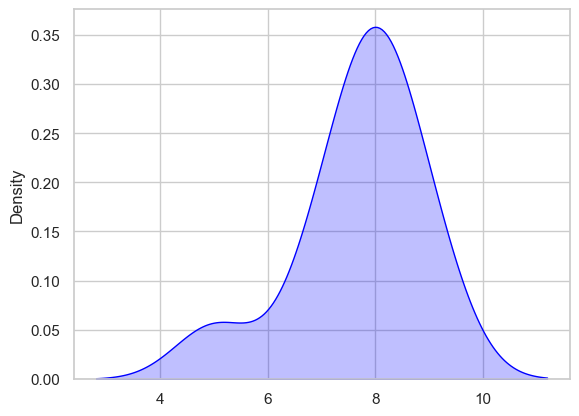

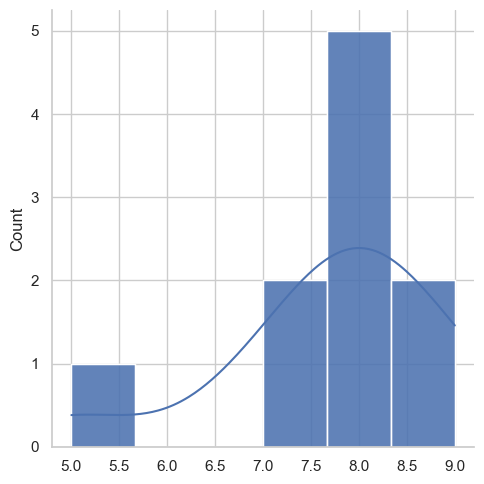

In [153]:
greater_than_5_bc, _ = stats.boxcox(greater_than_5)
plot_and_list(list=greater_than_5_bc, xlabel="Count", ylabel="Frequency", title=f"Box-Cox Frequency Curve of Count with Trials = {trials}")

In [154]:
trials = 20
greater_than_5 = []
greater_than_5 = throw_dice(probabilities, times, trials)

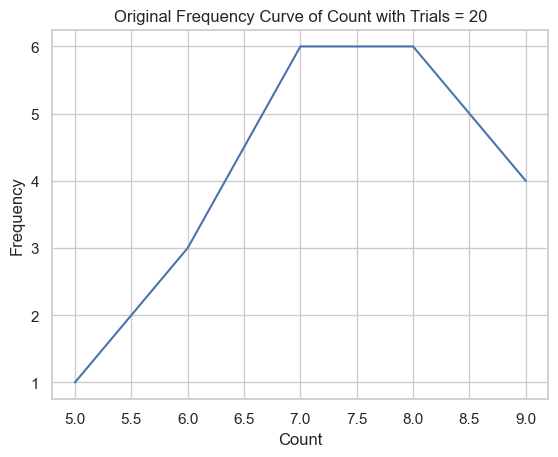

Mean = 7.45
Std Dev = 1.116915395184434
Mean Absolute Deviation = 0.95
Median = 7.5
Variance = 1.2475
Fisher Kurtosis = -0.6490174738254066
Pearson Kurtosis = 2.3509825261745934
Fisher Kurtosis with K-Statistics = -0.4737188629292066
Pearson Kurtosis with K-Statistics = 2.5262811370707934
Skewness = -0.30519927023726406


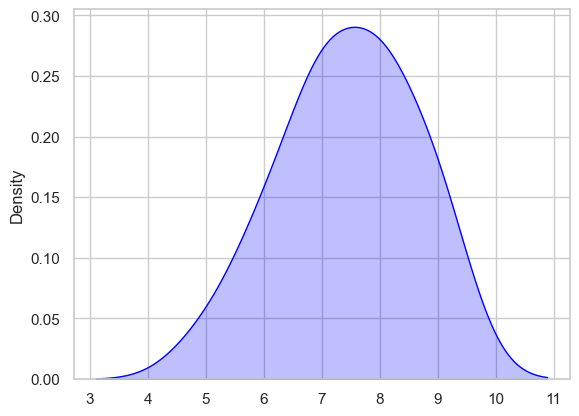

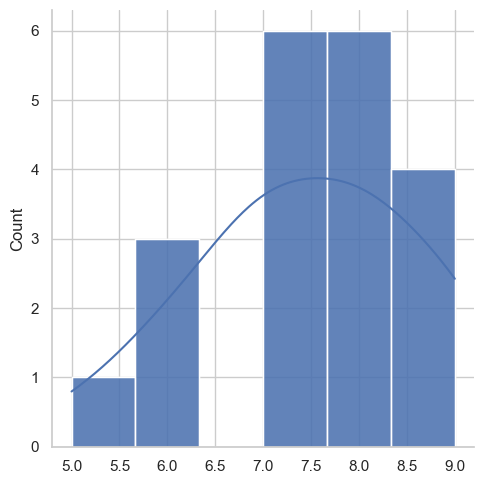

In [155]:
plot_and_list(list=greater_than_5, xlabel="Count", ylabel="Frequency", title=f"Original Frequency Curve of Count with Trials = {trials}")

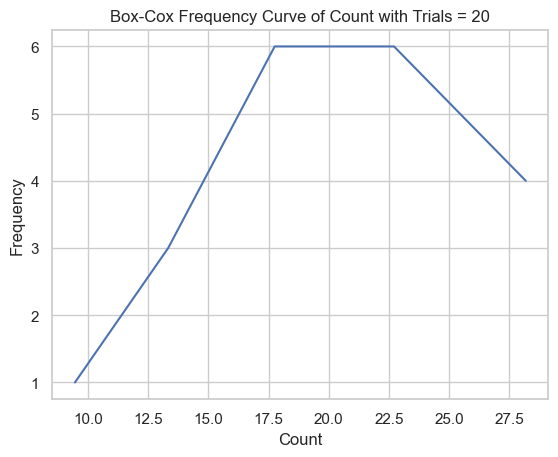

Mean = 20.249128408968616
Std Dev = 5.413820459442334
Mean Absolute Deviation = 4.653489345537295
Median = 20.232495829220827
Variance = 29.30945196707641
Fisher Kurtosis = -0.8569703642432902
Pearson Kurtosis = 2.14302963575671
Fisher Kurtosis with K-Statistics = -0.7448731220035061
Pearson Kurtosis with K-Statistics = 2.255126877996494
Skewness = -0.08020621479525263


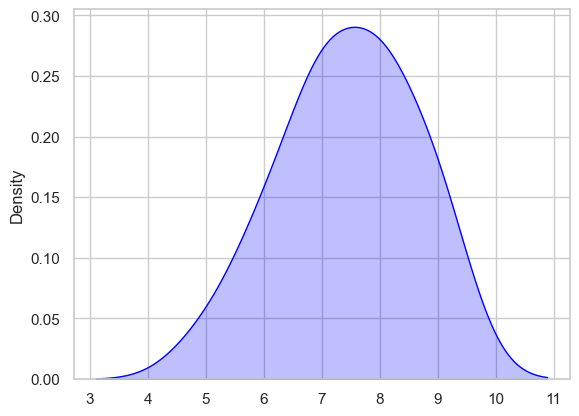

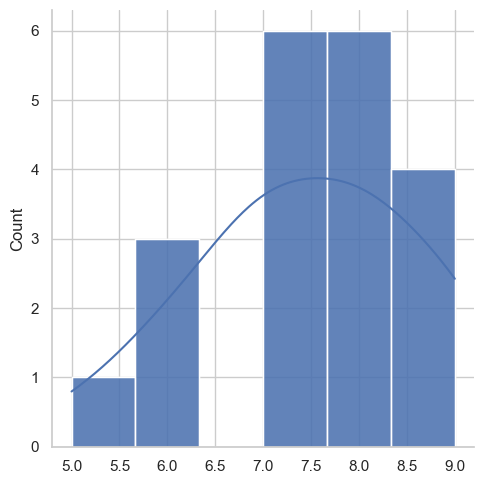

In [156]:
greater_than_5_bc, _ = stats.boxcox(greater_than_5)
plot_and_list(list=greater_than_5_bc, xlabel="Count", ylabel="Frequency", title=f"Box-Cox Frequency Curve of Count with Trials = {trials}")

In [157]:
trials = 30
greater_than_5 = []
greater_than_5 = throw_dice(probabilities, times, trials)

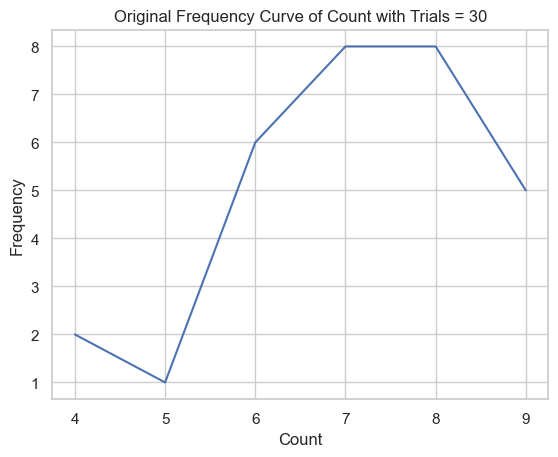

Mean = 7.133333333333334
Std Dev = 1.3597385369580761
Mean Absolute Deviation = 1.0844444444444443
Median = 7.0
Variance = 1.848888888888889
Fisher Kurtosis = -0.18569711538461497
Pearson Kurtosis = 2.814302884615385
Fisher Kurtosis with K-Statistics = 0.009336366758241788
Pearson Kurtosis with K-Statistics = 3.009336366758242
Skewness = -0.5602981408935868
Kurtosis Test Z-Score = 0.24443446667911936
Kurtosis Test P-Value = 0.8068943506337888


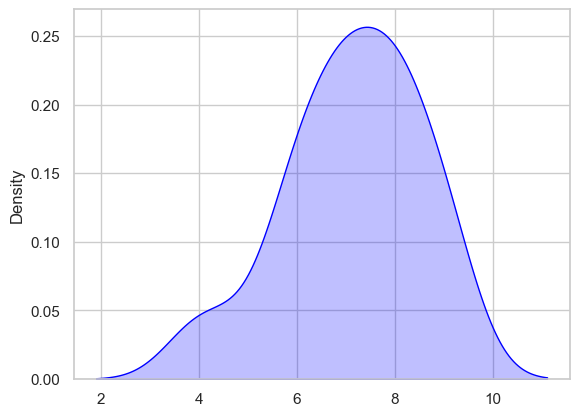

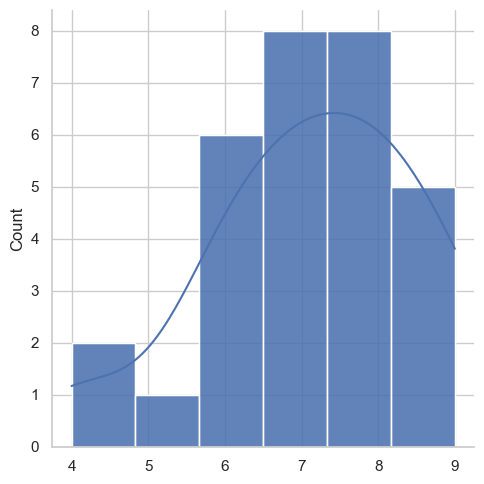

In [158]:
plot_and_list(list=greater_than_5, xlabel="Count", ylabel="Frequency", title=f"Original Frequency Curve of Count with Trials = {trials}")

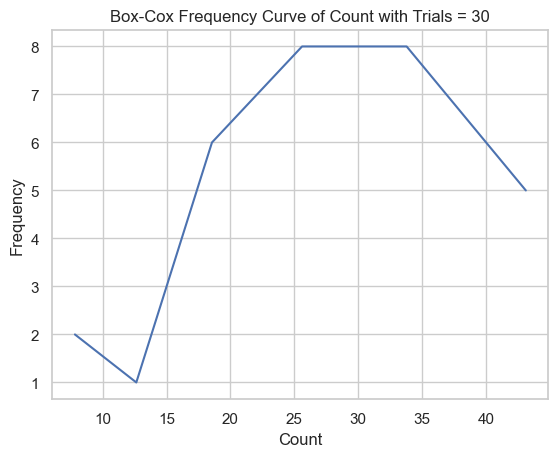

Mean = 27.67667305615677
Std Dev = 10.06469782703195
Mean Absolute Deviation = 8.405614503568374
Median = 25.602709141919608
Variance = 101.29814234946166
Fisher Kurtosis = -0.7301660327508372
Pearson Kurtosis = 2.2698339672491628
Fisher Kurtosis with K-Statistics = -0.6381207188399509
Pearson Kurtosis with K-Statistics = 2.361879281160049
Skewness = -0.11294059407271485
Kurtosis Test Z-Score = -0.8059557731881807
Kurtosis Test P-Value = 0.42026835066143153


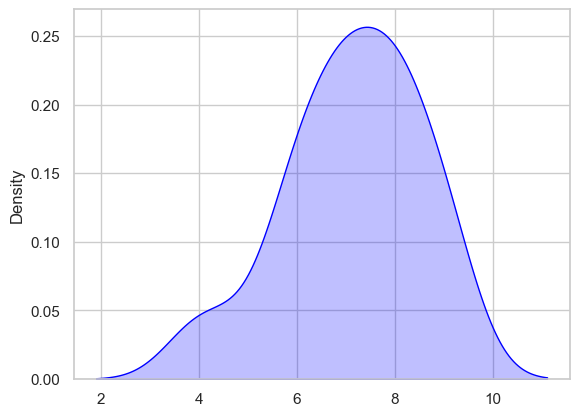

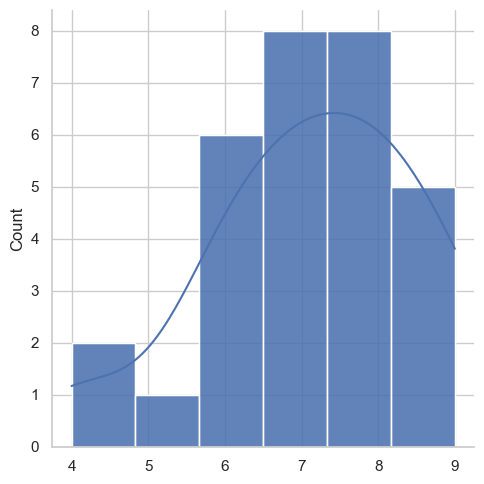

In [159]:
greater_than_5_bc, _ = stats.boxcox(greater_than_5)
plot_and_list(list=greater_than_5_bc, xlabel="Count", ylabel="Frequency", title=f"Box-Cox Frequency Curve of Count with Trials = {trials}")

In [160]:
trials = 40
greater_than_5 = []
greater_than_5 = throw_dice(probabilities, times, trials)

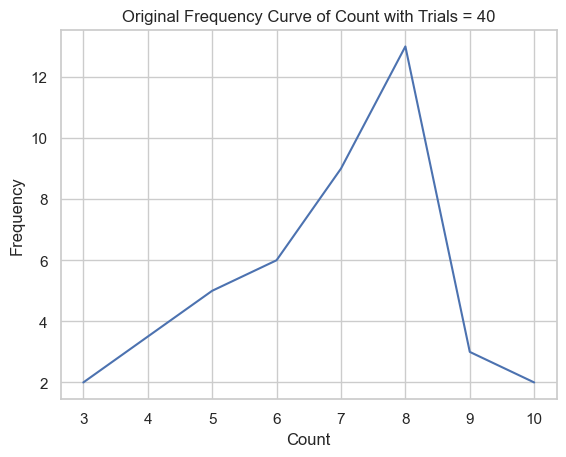

Mean = 7.025
Std Dev = 1.5888281845435648
Mean Absolute Deviation = 1.2275
Median = 7.0
Variance = 2.524375
Fisher Kurtosis = 0.25493417392848583
Pearson Kurtosis = 3.254934173928486
Fisher Kurtosis with K-Statistics = 0.45635828172948
Pearson Kurtosis with K-Statistics = 3.45635828172948
Skewness = -0.5645618817609874
Kurtosis Test Z-Score = 0.81426422370982
Kurtosis Test P-Value = 0.41549360033017935


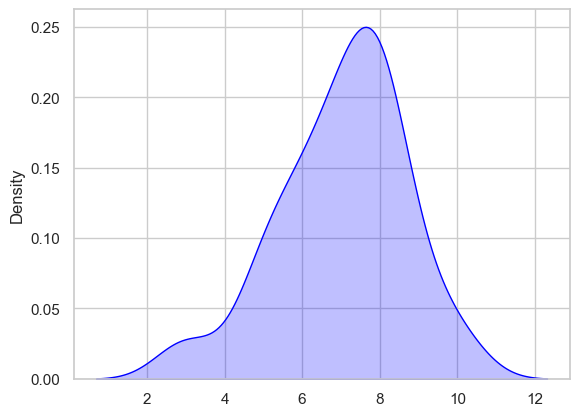

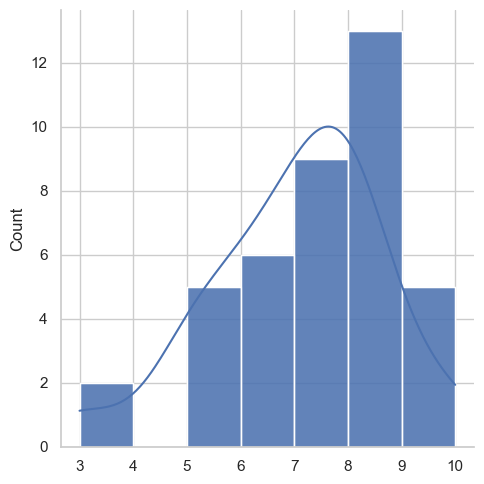

In [161]:
plot_and_list(list=greater_than_5, xlabel="Count", ylabel="Frequency", title=f"Original Frequency Curve of Count with Trials = {trials}")

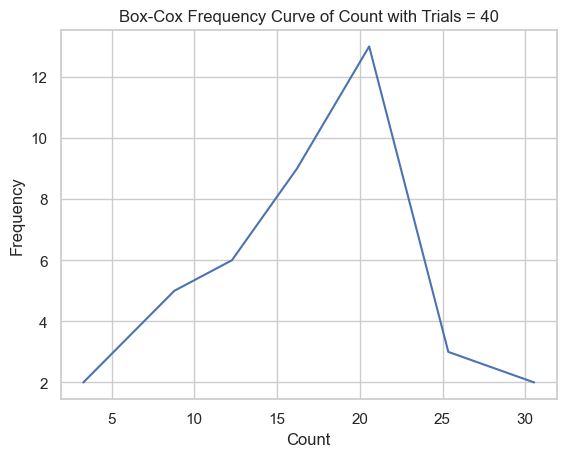

Mean = 16.86384481176754
Std Dev = 6.31093086106672
Mean Absolute Deviation = 5.049085191994672
Median = 16.20361754033992
Variance = 39.82784833316433
Fisher Kurtosis = -0.1672626813582685
Pearson Kurtosis = 2.8327373186417315
Fisher Kurtosis with K-Statistics = -0.02379304942522875
Pearson Kurtosis with K-Statistics = 2.9762069505747712
Skewness = -0.05938542386692588
Kurtosis Test Z-Score = 0.1905994266499809
Kurtosis Test P-Value = 0.8488394394243586


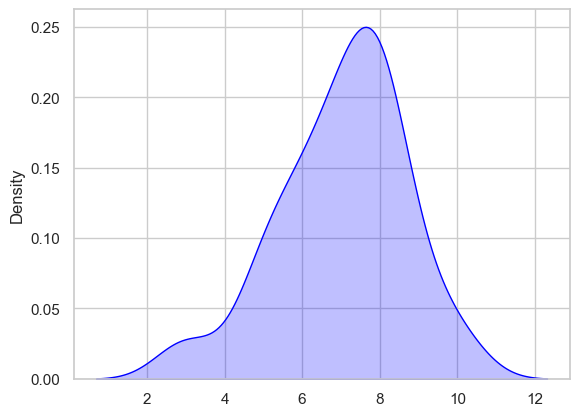

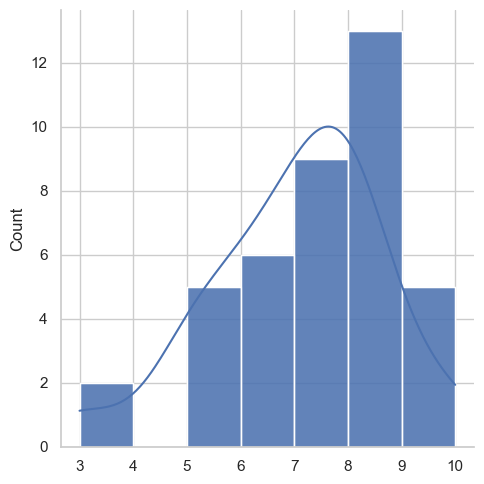

In [162]:
greater_than_5_bc, _ = stats.boxcox(greater_than_5)
plot_and_list(list=greater_than_5_bc, xlabel="Count", ylabel="Frequency", title=f"Box-Cox Frequency Curve of Count with Trials = {trials}")

In [163]:
trials = 100
greater_than_5 = []
greater_than_5 = throw_dice(probabilities, times, trials)

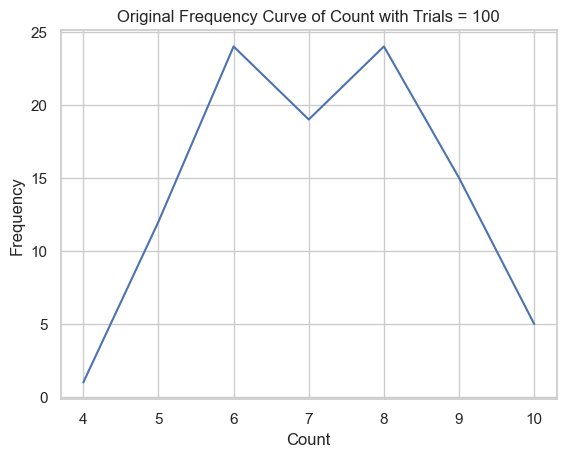

Mean = 7.18
Std Dev = 1.4379151574414952
Mean Absolute Deviation = 1.2216
Median = 7.0
Variance = 2.0676
Fisher Kurtosis = -0.8678935216608408
Pearson Kurtosis = 2.1321064783391592
Fisher Kurtosis with K-Statistics = -0.8504173493674259
Pearson Kurtosis with K-Statistics = 2.149582650632574
Skewness = 0.06648563092537951
Kurtosis Test Z-Score = -2.8097279330385834
Kurtosis Test P-Value = 0.004958339529982052


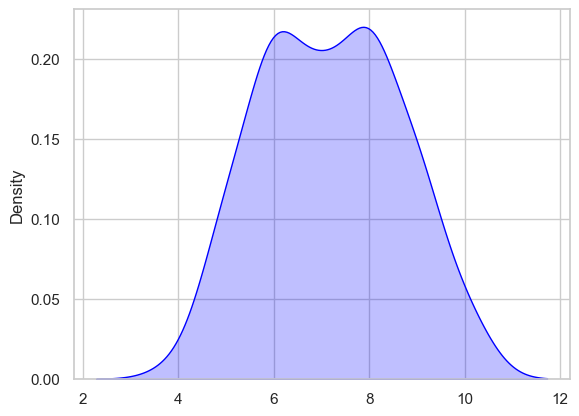

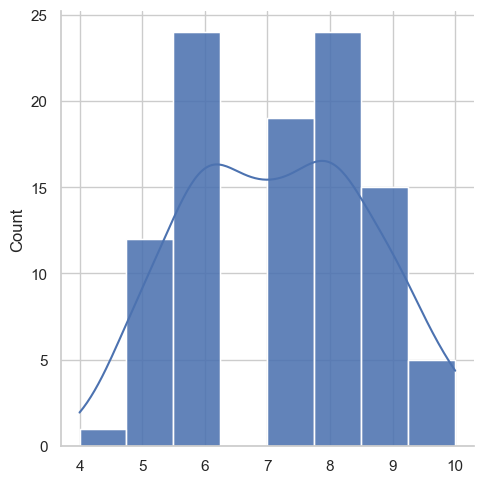

In [164]:
plot_and_list(list=greater_than_5, xlabel="Count", ylabel="Frequency", title=f"Original Frequency Curve of Count with Trials = {trials}")

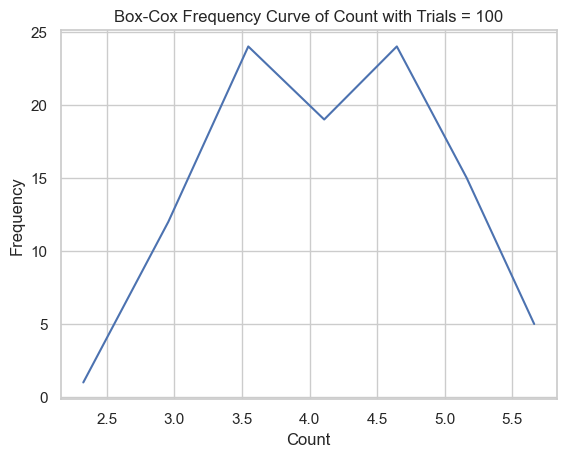

Mean = 4.18230354241999
Std Dev = 0.7864452231290925
Mean Absolute Deviation = 0.6647356484305262
Median = 4.108478086431033
Variance = 0.6184960889825681
Fisher Kurtosis = -0.856908222974273
Pearson Kurtosis = 2.143091777025727
Fisher Kurtosis with K-Statistics = -0.8388623313191412
Pearson Kurtosis with K-Statistics = 2.1611376686808588
Skewness = -0.0407988708744495
Kurtosis Test Z-Score = -2.742713421242309
Kurtosis Test P-Value = 0.006093383854630047


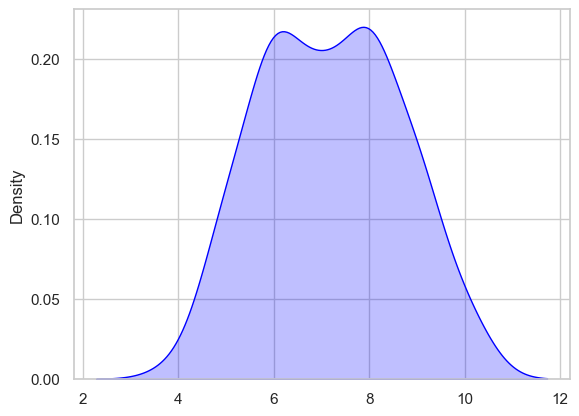

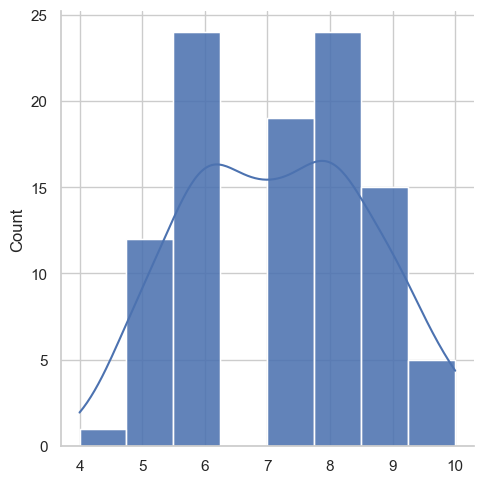

In [165]:
greater_than_5_bc, _ = stats.boxcox(greater_than_5) 
plot_and_list(list=greater_than_5_bc, xlabel="Count", ylabel="Frequency", title=f"Box-Cox Frequency Curve of Count with Trials = {trials}")

In [166]:
trials = 200
greater_than_5 = []
greater_than_5 = throw_dice(probabilities, times, trials)

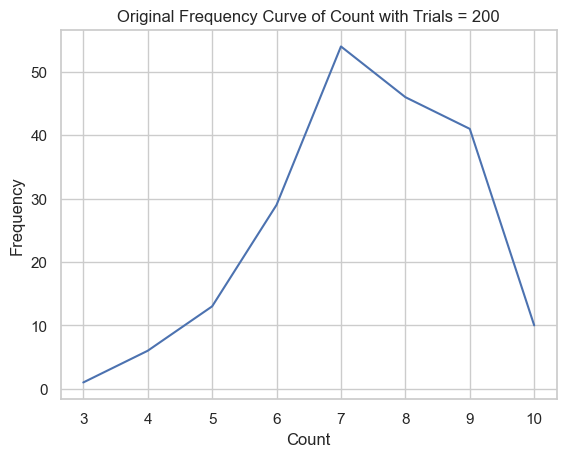

Mean = 7.405
Std Dev = 1.4460204009625865
Mean Absolute Deviation = 1.18715
Median = 7.0
Variance = 2.090975
Fisher Kurtosis = -0.19017615440272007
Pearson Kurtosis = 2.80982384559728
Fisher Kurtosis with K-Statistics = -0.16440691175599653
Pearson Kurtosis with K-Statistics = 2.8355930882440035
Skewness = -0.39091403584005047
Kurtosis Test Z-Score = -0.3879249118786542
Kurtosis Test P-Value = 0.6980716019416991


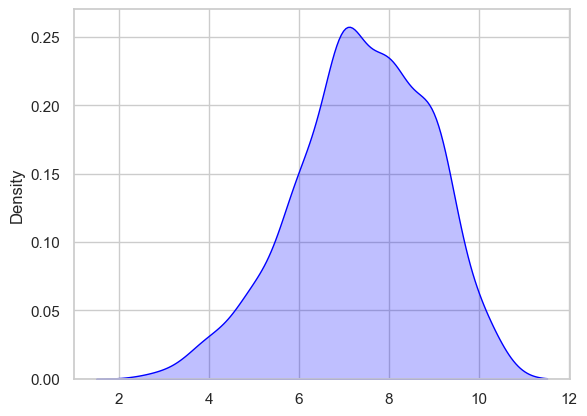

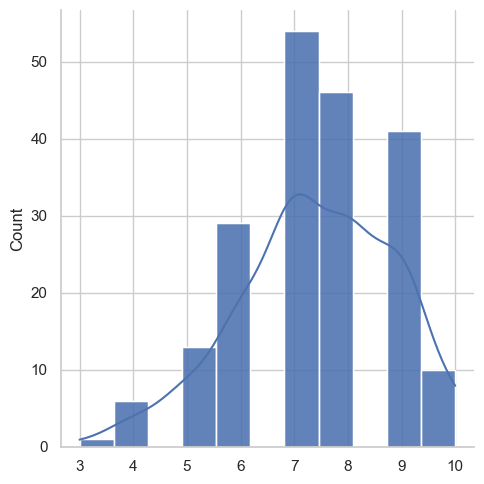

In [167]:
plot_and_list(list=greater_than_5, xlabel="Count", ylabel="Frequency", title=f"Original Frequency Curve of Count with Trials = {trials}")

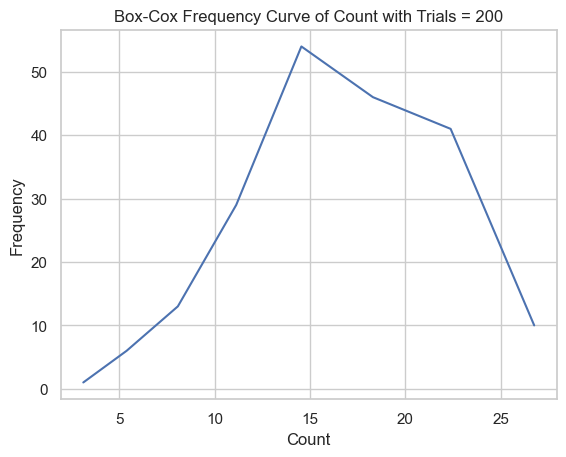

Mean = 16.37372910318154
Std Dev = 5.238564962330015
Mean Absolute Deviation = 4.377280785945319
Median = 14.545812233314384
Variance = 27.442562864551668
Fisher Kurtosis = -0.5345674789385426
Pearson Kurtosis = 2.4654325210614574
Fisher Kurtosis with K-Statistics = -0.5175656204189809
Pearson Kurtosis with K-Statistics = 2.482434379581019
Skewness = -0.06653071837099077
Kurtosis Test Z-Score = -1.914877129235692
Kurtosis Test P-Value = 0.05550817515960687


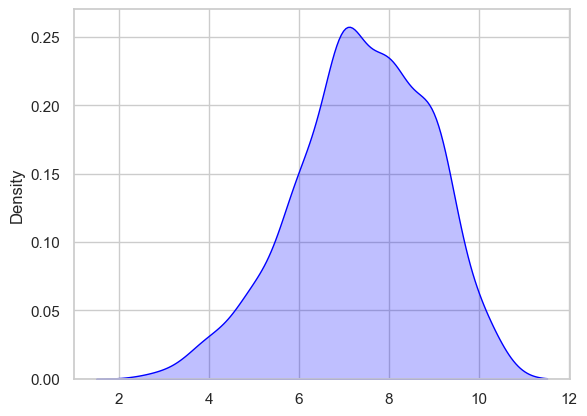

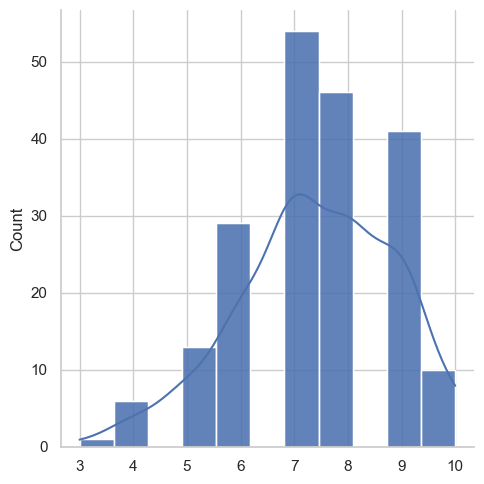

In [168]:
greater_than_5_bc, _ = stats.boxcox(greater_than_5)
plot_and_list(list=greater_than_5_bc, xlabel="Count", ylabel="Frequency", title=f"Box-Cox Frequency Curve of Count with Trials = {trials}")

In [169]:
trials = 1000
greater_than_5 = []
greater_than_5 = throw_dice(probabilities, times, trials)

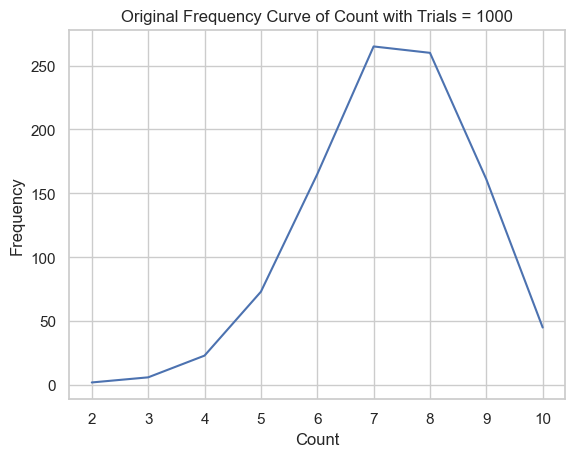

Mean = 7.303
Std Dev = 1.4237945778798289
Mean Absolute Deviation = 1.151604
Median = 7.0
Variance = 2.027191
Fisher Kurtosis = 0.08676350077005424
Pearson Kurtosis = 3.0867635007700542
Fisher Kurtosis with K-Statistics = 0.09322296951631781
Pearson Kurtosis with K-Statistics = 3.093222969516318
Skewness = -0.38510666849671654
Kurtosis Test Z-Score = 0.65698603774312
Kurtosis Test P-Value = 0.5111898941875568


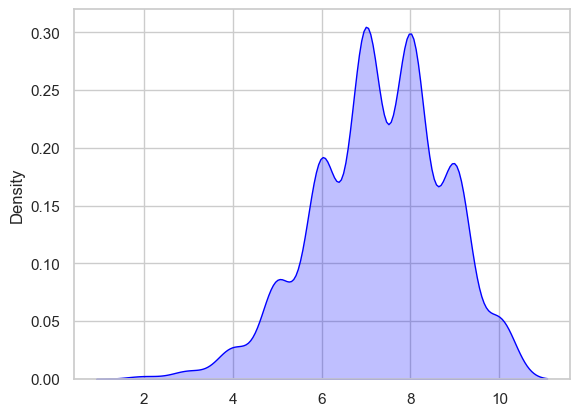

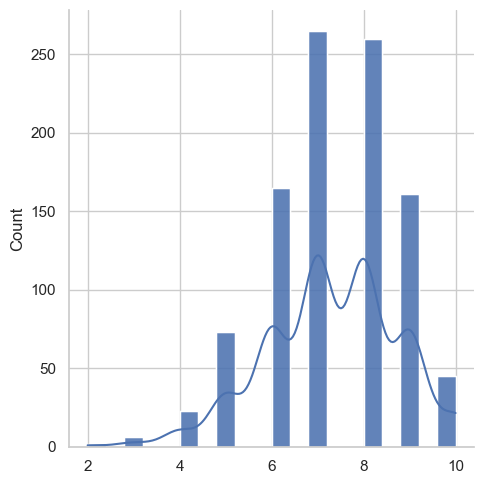

In [170]:
plot_and_list(list=greater_than_5, xlabel="Count", ylabel="Frequency", title=f"Original Frequency Curve of Count with Trials = {trials}")

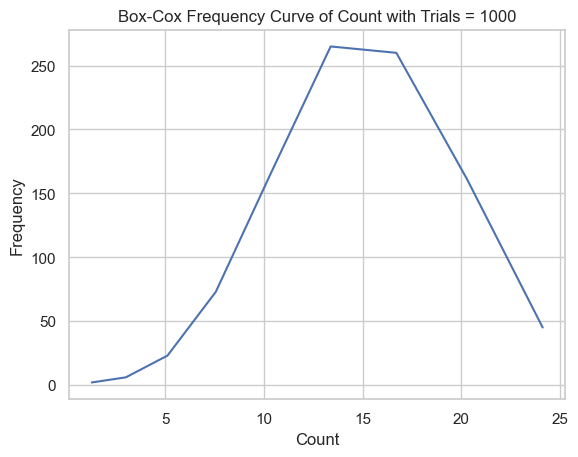

Mean = 14.6328037164881
Std Dev = 4.552281440371329
Mean Absolute Deviation = 3.753320096154872
Median = 13.376577665350064
Variance = 20.723266312349267
Fisher Kurtosis = -0.34726984761084534
Pearson Kurtosis = 2.6527301523891547
Fisher Kurtosis with K-Statistics = -0.34298838433235357
Pearson Kurtosis with K-Statistics = 2.6570116156676464
Skewness = -0.040519868675876966
Kurtosis Test Z-Score = -2.6305079881165763
Kurtosis Test P-Value = 0.008525736595593716


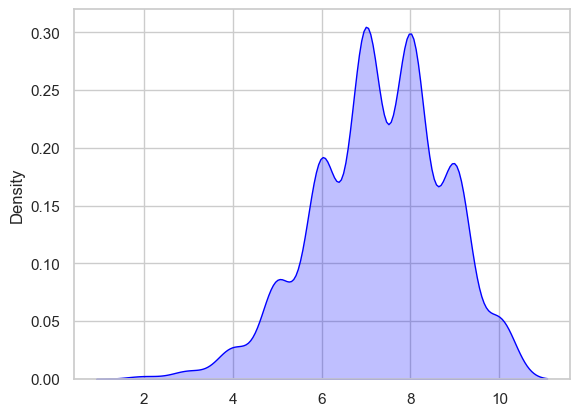

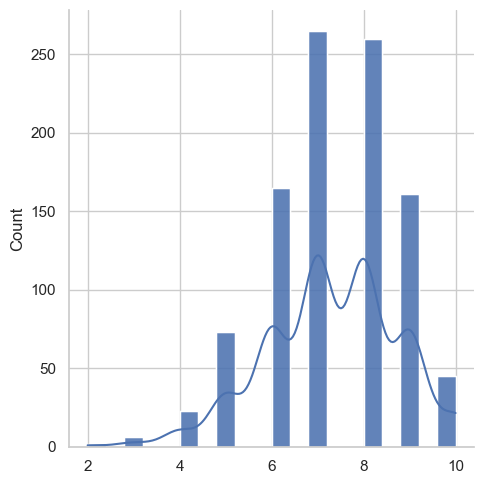

In [171]:
greater_than_5_bc, _ = stats.boxcox(greater_than_5)
plot_and_list(list=greater_than_5_bc, xlabel="Count", ylabel="Frequency", title=f"Box-Cox Frequency Curve of Count with Trials = {trials}")

In [172]:
trials = 100000
greater_than_5 = []
greater_than_5 = throw_dice(probabilities, times, trials)

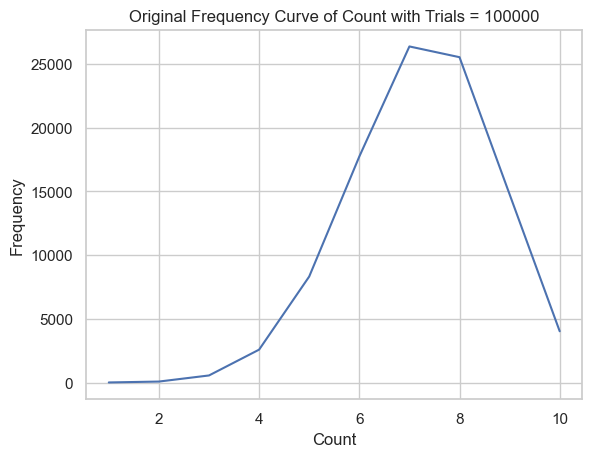

Mean = 7.22399
Std Dev = 1.4180262620628716
Mean Absolute Deviation = 1.1445546276
Median = 7.0
Variance = 2.0107984798999996
Fisher Kurtosis = -0.1315963216741114
Pearson Kurtosis = 2.8684036783258886
Fisher Kurtosis with K-Statistics = -0.13154289932699204
Pearson Kurtosis with K-Statistics = 2.868457100673008
Skewness = -0.2952284810644908
Kurtosis Test Z-Score = -9.089368468079227
Kurtosis Test P-Value = 9.961598089200682e-20


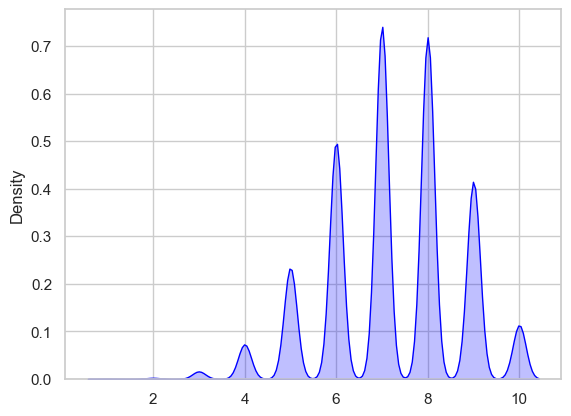

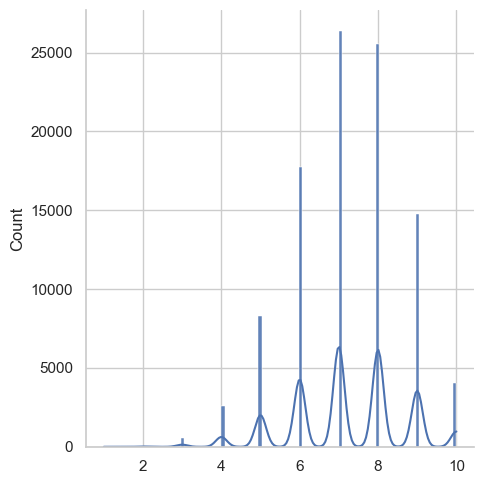

In [173]:
plot_and_list(list=greater_than_5, xlabel="Count", ylabel="Frequency", title=f"Original Frequency Curve of Count with Trials = {trials}")

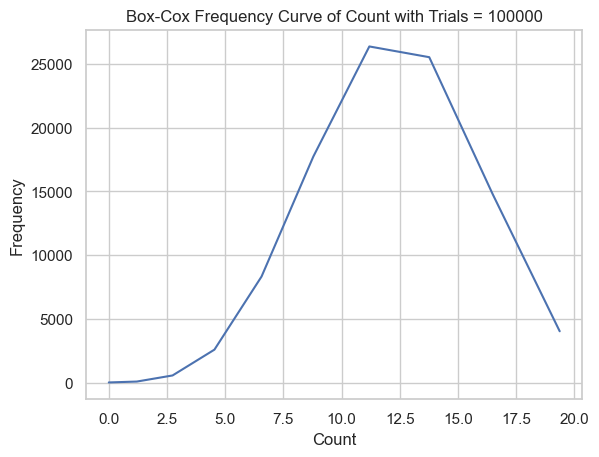

Mean = 11.920036799488813
Std Dev = 3.525620850551831
Mean Absolute Deviation = 2.8907092311431044
Median = 11.189671181930802
Variance = 12.430002381845817
Fisher Kurtosis = -0.3829158899557603
Pearson Kurtosis = 2.6170841100442397
Fisher Kurtosis with K-Statistics = -0.38287503403944534
Pearson Kurtosis with K-Statistics = 2.6171249659605547
Skewness = -0.04104674327464989
Kurtosis Test Z-Score = -30.83375632347522
Kurtosis Test P-Value = 9.249499286389022e-209


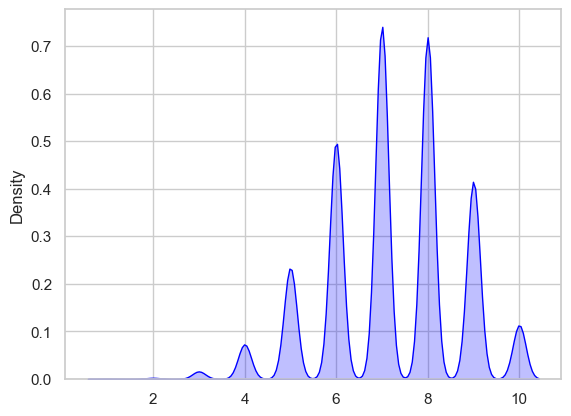

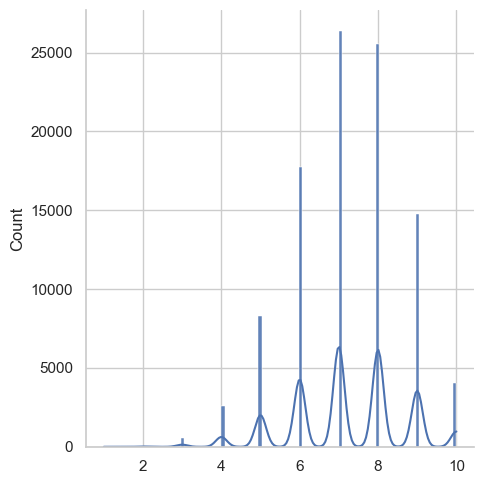

In [174]:
greater_than_5_bc, _ = stats.boxcox(greater_than_5)
plot_and_list(list=greater_than_5_bc, xlabel="Count", ylabel="Frequency", title=f"Box-Cox Frequency Curve of Count with Trials = {trials}")